In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
alldata = pd.read_csv('data/medications.csv')

In [4]:
#data cleaning
alldata.drop(columns=['REASONCODE', 'REASONDESCRIPTION'], inplace= True)



In [5]:
#analysis

#financial analysis
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])*100

alldata.columns

Index(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST',
       'COVERAGE_RATIO'],
      dtype='object')

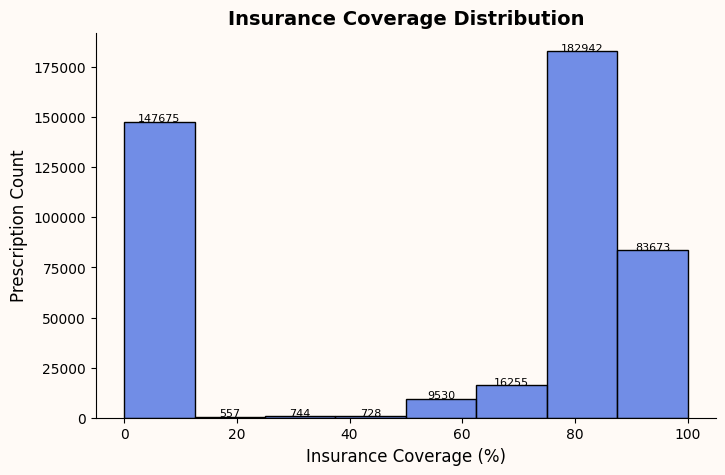

In [10]:
#insurance coverage plot

plt.figure(figsize=(8, 5), facecolor='#FFFAF6')
ax = sns.histplot(alldata['COVERAGE_RATIO'],bins=8,color="royalblue", stat='count')
ax.set_facecolor('#FFFAF6')

plt.xlabel("Insurance Coverage (%)", fontsize=12)
plt.ylabel("Prescription Count", fontsize=12)
plt.title("Insurance Coverage Distribution", fontsize=14, fontweight="bold")

for p in ax.patches:
    height = p.get_height()
    if height > 500:  
        plt.text(p.get_x() + p.get_width() / 2, height + 1,  
                 f"{int(height)}", ha="center", fontsize=8, fontweight="light")

sns.despine()
plt.show()


In [ ]:
#highest cost meds
med_lookup = alldata[['CODE', 'DESCRIPTION']].drop_duplicates(subset=['CODE'])

highcost_meds_with_names = highcost_meds.merge(med_lookup, on='CODE', how='left')

prescription_counts = alldata.groupby('CODE', as_index=False)['CODE'].size()
prescription_counts.rename(columns={'size': 'PRESCRIBED'}, inplace=True)

final_table = highcost_meds_with_names.merge(prescription_counts, on='CODE', how='left')
final_table = final_table[['DESCRIPTION', 'BASE_COST', 'PRESCRIBED']]
final_table.rename(columns={'DESCRIPTION': 'MEDICINE NAME'}, inplace=True)

final_table = final_table.sort_values(by='BASE_COST', ascending=False)

In [19]:
#finding meds that are and aren't insured

#80% and above
insured80 = alldata[alldata['COVERAGE_RATIO']> 79][['DESCRIPTION', 'BASE_COST']].drop_duplicates()

insured80.sort_values(by = ['BASE_COST'], ascending=False)

#20% and below
insured20 = alldata[alldata['COVERAGE_RATIO']< 21][['DESCRIPTION', 'BASE_COST']].drop_duplicates()

insured20.sort_values(by = ['BASE_COST'], ascending=False)

,DESCRIPTION,BASE_COST
66408,Alteplase 100 MG Injection,186925.20
67567,Alteplase 100 MG Injection,164934.00
311550,exemestane 25 MG Oral Tablet,9718.36
153203,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,8523.16
413317,Memantine hydrochloride 2 MG/ML Oral Solution,6888.99
...,...,...
17348,Acetaminophen 500 MG Oral Tablet,0.05
17063,Acetaminophen 500 MG Oral Tablet,0.04
17061,Acetaminophen 500 MG Oral Tablet,0.03
17362,Acetaminophen 500 MG Oral Tablet,0.02


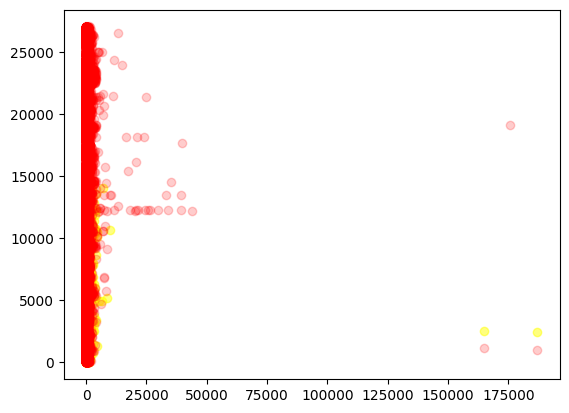

In [20]:
insured20['Index'] = range(1, len(insured20)+1)
insured80['Index'] = range(1, len(insured80)+1)

plt.figure()
plt.scatter(insured20['BASE_COST'], insured20['Index'], color = 'yellow', alpha= 0.5)

plt.scatter(insured80['BASE_COST'], insured80['Index'], color= 'red', alpha= 0.2)


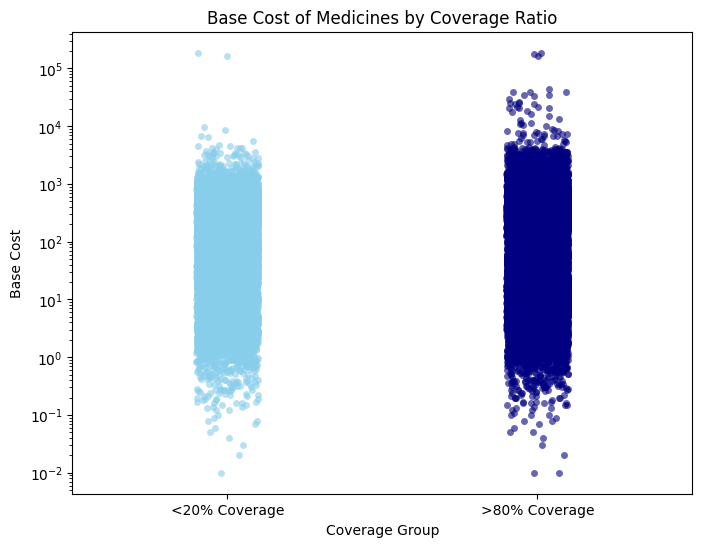

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Strip plot for <20% coverage
sns.stripplot(x=['<20% Coverage'] * len(insured20), y=insured20['BASE_COST'], jitter=True, alpha=0.6, color='skyblue')

# Strip plot for >80% coverage
sns.stripplot(x=['>80% Coverage'] * len(insured80), y=insured80['BASE_COST'], jitter=True, alpha=0.6, color='navy')

# Labels & Formatting
plt.title('Base Cost of Medicines by Coverage Ratio')
plt.xlabel('Coverage Group')
plt.ylabel('Base Cost')
plt.yscale('log')  # Use log scale if base costs vary significantly
plt.show()


In [ ]:
#finding all the costs for a medicine
mednames = alldata['DESCRIPTION'].unique()



333
